# WA5FRF FFM Data Plots

In [184]:
# import required packages:
import urllib
import pandas as pd
import plotly.express as px
import wget
import os                                      # for making sure we have a directory to write data to
import data
import datetime
# Generate output directories:
if not os.path.exists('data'):
    os.makedirs('data')
if not os.path.exists('plots'):
    os.makedirs('plots')
    
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math
import numpy as np

import scipy as scp
from scipy import integrate

In [185]:
def fontoptions(fig):    # set consistent layout parameters
    fig.update_layout(
    font=dict(
#         family="Courier New, monospace",
        size=18,
# #         color="RebeccaPurple"
        )
    )

    # Eliminate the gray background plotly express uses by default:
    fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)'
    })
    
    # Change grid color and axis colors
    fig.update_xaxes(showline=True, linewidth=1, linecolor='black', gridcolor='darkgray')
    fig.update_yaxes(showline=True, linewidth=1, linecolor='black', gridcolor='darkgray')
    

## Import Digitized Spectrum Data

In [186]:
df = pd.read_csv('data/WA5FRF-FFM.csv')
df['Date']= datetime.datetime(2019, 10, 1, 0, 0, 0) + pd.to_timedelta(df['Time UTC'], 'hours')
df.drop(['Time UTC'], axis = 1)
# df[Time] = datetime.timedelta(hours=data['Time UTC'])

F1 = df[df['Mode']=='1F']
# F1.set_index('Date')
F2 = df[df['Mode']=='2F']
E = df[df['Mode']=='E']


In [187]:
# Set colors
color_1F = "#0000ff"
color_2F = "#F46C14"
color_E = "#0f0f0f"

color_Boulder = "#552DC9"
color_Austin = "#8DE6AE"

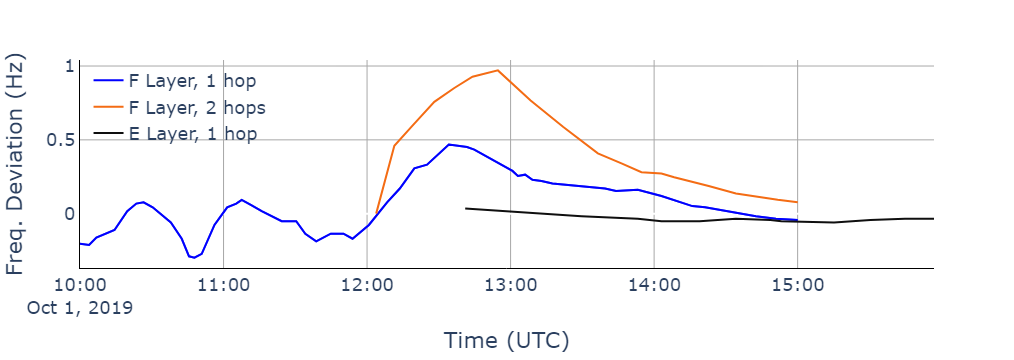

In [188]:
# fig = px.line(F1['Freq Hz'], F1['Date'])

# fig.add_line(px.line(F2['Freq Hz'], F2['Date']))
fig = px.line(x=F1['Date'], y=F1['Freq Hz'])
fig.add_scatter(x=F1['Date'], y=F1['Freq Hz'], mode = 'lines', line_color = color_1F, name = "F Layer, 1 hop")
fig.add_scatter(x=F2['Date'], y=F2['Freq Hz'], mode='lines', line_color = color_2F, name = "F Layer, 2 hops")
fig.add_scatter(x=E['Date'], y=E['Freq Hz'], mode='lines', line_color = color_E, name = "E Layer, 1 hop")

# fig.add_trace(px.line(F2['Freq Hz'], F2['Date']))

fontoptions(fig)

fig.update_layout(
    # title="Digitized Spectrogram",
    xaxis_title="Time (UTC)",
    yaxis_title='Freq. Deviation (Hz)',
    # legend_title="Trace"
)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))


fig.show()
fig.write_html("plots/"+ "Digitized spectrogram" + "_plot.html", include_plotlyjs="cdn")
# fig.write_image("plots/9b.png")
# F1

In [189]:
# TESTING
# import scipy as scp
# from scipy import integrate
# np.trapz(np.array(pathvel_2F))
# # pathvel_2F.cumsum()
# scp.integrate.cumtrapz(np.array(pathvel_2F))

In [190]:
F1.reset_index()

,index,Mode,Time UTC,Freq Hz,Date
0,0,1F,9.99992,-0.20398,2019-10-01 09:59:59.712000000
1,1,1F,10.06322,-0.21249,2019-10-01 10:03:47.592000000
2,2,1F,10.11386,-0.16143,2019-10-01 10:06:49.896000000
3,3,1F,10.24046,-0.11037,2019-10-01 10:14:25.656000000
4,4,1F,10.32908,0.01728,2019-10-01 10:19:44.688000000
5,5,1F,10.39238,0.06834,2019-10-01 10:23:32.568000000
6,6,1F,10.44302,0.07685,2019-10-01 10:26:34.872000000
7,7,1F,10.50632,0.04281,2019-10-01 10:30:22.752000000
8,8,1F,10.63292,-0.05931,2019-10-01 10:37:58.512000000
9,9,1F,10.70888,-0.16994,2019-10-01 10:42:31.968000000


In [203]:
c = 299792458 # speed of light in m/s
f = 5e6 # Freq in Hz

def pathcalcs(df):
    pathvel = np.array(df['Freq Hz'] *(-c/f))
    # pathlen = scp.integrate.cumtrapz(pathvel_1F)
    
    delT=np.zeros(len(df['Time UTC']))
    pathInc = np.zeros(len(df['Time UTC']))
    RelPathLen = np.zeros(len(df['Time UTC']))
    for i in range(1, len(df['Time UTC'])):
        delT[i] = pd.to_numeric(df['Time UTC'])[i] - pd.to_numeric(df['Time UTC'])[i-1]
        pathInc[i] = delT[i]*(pathvel[i-1]+pathvel[i])/2
        RelPathLen[i] = pathInc[i] + RelPathLen[i-1]
    pathlen = RelPathLen#.cumsum()
    a = [pathvel,pathlen]
    return a

pathcalcs(F1)
    

[array([ 1.22303331e+01,  1.27405799e+01,  9.67909930e+00,  6.61761872e+00,
        -1.03608273e+00, -4.09756332e+00, -4.60781008e+00, -2.56682303e+00,
         3.55613814e+00,  1.01893461e+01,  1.73328008e+01,  1.78430475e+01,
         1.63123072e+01,  4.57663166e+00,  4.94657556e-01, -2.56682303e+00,
        -4.09756332e+00, -5.62830361e+00, -3.58731655e+00, -1.03608273e+00,
         3.04589137e+00,  3.04589137e+00,  8.14835901e+00,  1.12098396e+01,
         8.14835901e+00,  8.14835901e+00,  1.01893461e+01,  4.57663166e+00,
        -4.60781008e+00, -1.02205245e+01, -1.83844727e+01, -1.99152130e+01,
        -2.80791612e+01, -2.70586677e+01, -2.60381741e+01, -1.73639792e+01,
        -1.53229921e+01, -1.58332389e+01, -1.37922518e+01, -1.32820051e+01,
        -1.22615115e+01, -1.02205245e+01, -9.20003095e+00, -9.71027771e+00,
        -7.15904390e+00, -4.60781008e+00, -3.07706979e+00, -2.56682303e+00,
        -1.55892078e-02,  1.00490432e+00,  2.02539785e+00,  2.53564461e+00]),
 array([  

In [192]:
pathcalcs(E.reset_index())

[array([-2.05657626,  1.00490432,  2.02539785,  3.04589137,  3.04589137,
         2.02539785,  2.53564461,  3.04589137,  3.55613814,  2.53564461,
         2.02539785,  2.02539785]),
 array([ 0.        , -0.42605334,  0.16858286,  0.58589925,  1.39567993,
         2.03770514,  2.58626172,  2.79824845,  4.01018301,  4.78140271,
         5.32995928,  5.74022387])]

In [193]:
# TESTING

df['Time UTC']

0      9.99992
1     10.06322
2     10.11386
3     10.24046
4     10.32908
        ...   
83    14.88668
84    15.25382
85    15.50702
86    15.74756
87    15.95012
Name: Time UTC, Length: 88, dtype: float64

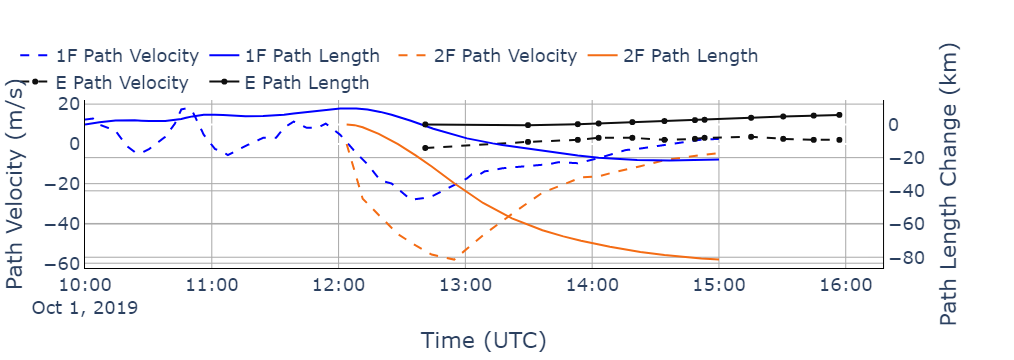

In [195]:
c = 299792458 # speed of light in m/s
f = 5e6 # Freq in Hz
pathvel_1F, pathlen_1F = pathcalcs(F1)
pathvel_2F, pathlen_2F = pathcalcs(F2.reset_index())
pathvel_E, pathlen_E = pathcalcs(E.reset_index())

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=F1['Date'], y=pathvel_1F, name="1F Path Velocity", line={'dash': 'dash', 'color': color_1F}),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=F1['Date'], y=pathlen_1F, name="1F Path Length", line_color = color_1F),
    secondary_y=True,
)

# # Add figure title
# fig.update_layout(
#     title_text="Double Y Axis Example"
# )

# Set x-axis title
fig.update_xaxes(title_text="UTC Time")

# Set y-axes titles
fig.update_yaxes(title_text="Path Velocity (m/s)", secondary_y=False)
fig.update_yaxes(title_text="Path Length Change (km)", secondary_y=True)

#############################################################################################
# Let's repeat that for 2F...

# pathlen_2F = pathvel_2F.cumsum()
# pathlen_2F = np.trapz(pathvel_2F)

# Add traces
fig.add_trace(
    go.Scatter(x=F2['Date'], y=pathvel_2F, name="2F Path Velocity", line={'dash': 'dash', 'color': color_2F}),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=F2['Date'], y=pathlen_2F, name="2F Path Length", line_color = color_2F),
    secondary_y=True,
)

#############################################################################################
# And for E....

# Add traces
fig.add_trace(
    go.Scatter(x=E['Date'], y=pathvel_E, name="E Path Velocity", line={'dash': 'dash', 'color': color_E}),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=E['Date'], y=pathlen_E, name="E Path Length", line_color = color_E),
    secondary_y=True,
)
################################################################################################

fontoptions(fig)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1,
    xanchor="right",
    x=.8
))

# Set x-axis title
fig.update_xaxes(title_text="Time (UTC)")

# Set y-axes titles
fig.update_yaxes(title_text="Path Velocity (m/s)", secondary_y=False)
fig.update_yaxes(title_text="Path Length Change (km)", secondary_y=True)


fig.show()
fig.write_html("plots/"+ "PathVel" + "_plot.html", include_plotlyjs="cdn")
# fig.write_image("plots/9c.png")

## Read Ionosonde Data
This data was obtained using the notebook at https://github.com/KCollins/didbase-fetch.

In [196]:
hmF2 = pd.read_csv('data/FFM-hmF2.csv')
hmF2 = hmF2.dropna()
hmF2 = hmF2.sort_index()   # should ensure datapoints are sorted in time
hmF1 = pd.read_csv('data/FFM-hmF1.csv')
hmF1 = hmF1.sort_index()
hmE = pd.read_csv('data/FFM-hmE.csv')
idx = hmE['Time'] > str(datetime.datetime(2019, 10, 1, 13, 35, 5))
hmE = hmE[idx] # Filter to ignore stand-in values for hmE

Overplot ionosonde data with the relative path length changes we identified: 

In [197]:
# Define a function to get height change from N hops, path length, h0:
def deltaheight(N=1, X = 1350, h0 =300, pathlen = 2):
    P0 = 2*N* np.sqrt((X/(2*N))**2 + h0**2) 
    path_total = P0 + pathlen # B
    # deltaheight = (np.sqrt(path_total**2 - (X**2))/(2*N) - h0)
    # total_height = np.sqrt((path_total/(2*N))**2 - (X/(2*N))**2)
    total_height = (0.5*N) * np.sqrt(path_total**2 - X**2)
    deltaheight = total_height - h0
    print('Change in Height:' + str(deltaheight))
    return deltaheight

deltaheight()
    

Change in Height:2.4538455207163565


2.4538455207163565

In [198]:
# TESTING



In [199]:
# def heightvec(pathlen_vec, N=1, X = 1350, h0 =278):
#     heightvec = pathlen_vec
#     for idx, pathlen in enumerate(pathlen_vec):
#         heightvec[idx] = h0 
#         print('h0 =====' + str(h0))
#         print('pathlen =====' + str(pathlen))
#         h0=deltaheight(N=N, X = X, h0 =h0, pathlen = pathlen)
#     return heightvec
    

Change in Height:[-1.70530257e-13  9.71666928e-01  1.66796981e+00  2.92989867e+00
  3.23179117e+00  3.03348569e+00  2.76429191e+00  2.48675946e+00
  2.56331891e+00  3.20091986e+00  4.05028426e+00  4.86261140e+00
  5.91162972e+00  7.03107234e+00  7.18610316e+00  7.13860001e+00
  6.88386776e+00  6.66067321e+00  6.30792349e+00  6.09539507e+00
  6.26478092e+00  6.63789808e+00  7.06595901e+00  7.95267970e+00
  9.13169746e+00  9.99781259e+00  1.06924999e+01  1.16971144e+01
  1.16947605e+01  1.09103180e+01  9.17509184e+00  7.13188732e+00
  2.70404878e+00 -1.58613517e+00 -3.25249537e+00 -1.04947252e+01
 -1.12830114e+01 -1.22874724e+01 -1.32453432e+01 -1.43428993e+01
 -1.55898346e+01 -2.09471889e+01 -2.19139271e+01 -2.38049021e+01
 -2.56429553e+01 -2.66335517e+01 -2.70874479e+01 -2.74212099e+01
 -2.78580711e+01 -2.77910878e+01 -2.75091321e+01 -2.70467110e+01]
Change in Height:[-3.41060513e-13 -1.65575739e+00  6.46798016e-01  2.22838908e+00
  5.22251634e+00  7.53119549e+00  9.46146299e+00  1.019

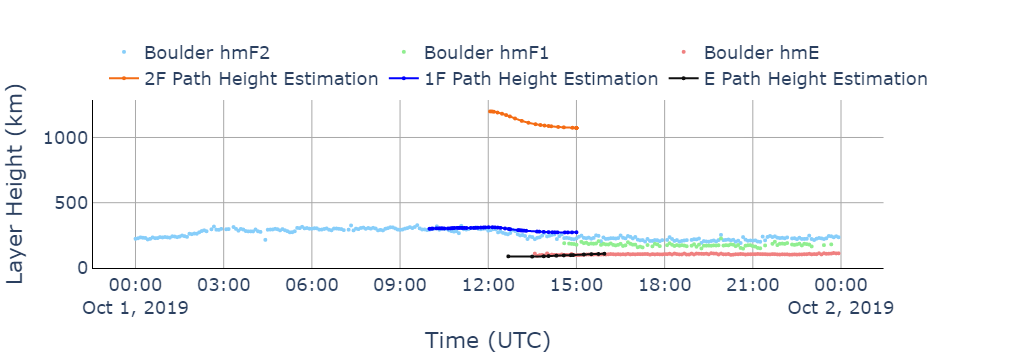

In [200]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
import numpy as np

N = 1
X = 1350 # dist from WWV to WA5FRF
h0_F2=300 #278
h0_E = 88.4
# calculate change in layer height:
deltaheight_F1 = (deltaheight(N=1, X = 1350, h0 = h0_F2, pathlen = pathlen_1F) + h0_F2)#
deltaheight_E = deltaheight(N=1, X = 1350, h0 = h0_E, pathlen = pathlen_E)+h0_E
deltaheight_F2 = deltaheight(N=2, X = 1350, h0 = h0_F2, pathlen = pathlen_2F)+h0_F2


fig.add_trace(
    go.Scatter(x=hmF2['Time'], y=hmF2['BOULDER'], 
               mode = 'markers', 
               marker=dict(
                    color='LightSkyBlue',
                    size=4,
                #     line=dict(
                #         color='MediumPurple',
                #         width=15
                # )
               ),
               # line_shape='spline',
               name="Boulder hmF2"),
    # secondary_y=True,
)

# fig.add_trace(
#     go.Scatter(x=hmF2['Time'], y=hmF2['BOULDER'].rolling(10).mean(), 
#                # mode = 'markers', 
#                line_shape='spline',
#                line_color = color_Boulder,
#                name="Boulder hmF2 Rolling Mean"),
#     secondary_y=True,
# )

 
fig.add_trace(
    go.Scatter(x=hmF1['Time'], y=hmF1['BOULDER'], 
               mode = 'markers', 
               marker=dict(
                    color='LightGreen',
                    size=4,
                #     line=dict(
                #         color='MediumPurple',
                #         width=15
                # )
               ),
               line_color = color_Boulder,
               name="Boulder hmF1"),
    # secondary_y=True, 
)


fig.add_trace(
    go.Scatter(x=hmE['Time'], y=hmE['BOULDER'], 
               mode = 'markers', 
               marker=dict(
                    color='LightCoral',
                    size=4,
                #     line=dict(
                #         color='MediumPurple',
                #         width=15
                # )
               ),
               name="Boulder hmE"),
    # secondary_y=True, 
)


fig.add_trace(
    go.Scatter(x=F2['Date'], y=deltaheight_F2, 
               mode = 'lines+markers',
               marker=dict(
                    size=4,
               ),
               line_shape='spline', 
               line_color = color_2F,
               name="2F Path Height Estimation"),
    # secondary_y=True
)

fig.add_trace(
    go.Scatter(x=F1['Date'], y=deltaheight_F1, 
               mode = 'lines+markers',
               marker=dict(
                    size=4,
               ),
               line_shape='spline', 
               line_color = color_1F,
               name="1F Path Height Estimation"),
    # secondary_y=True
)



fig.add_trace(
    go.Scatter(x=E['Date'], y=deltaheight_E, 
               mode = 'lines+markers',
               marker=dict(
                    size=4,
               ),
               line_shape='spline', 
               line_color = color_E,
               name="E Path Height Estimation"),
    # secondary_y=True
)

# Set x-axis title
fig.update_xaxes(title_text="Time (UTC)")

# Set y-axes titles
fig.update_yaxes(title_text="Layer Height (km)", secondary_y=False)

fontoptions(fig)


fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.show()
fig.write_html("plots/"+ "Ionosonde Comparison" + "_plot.html", include_plotlyjs="cdn")
# fig.write_image("plots/9d.png")




## Simulation Data

In [201]:
# Import data from raytrace simulation...
sim = pd.read_csv('data/WA5FRF 20 January IRI Raytrace.csv')
sim = sim.dropna()
sim
# df['Date']= datetime.datetime(2019, 10, 1, 0, 0, 0) + pd.to_timedelta(df['Time UTC'], 'hours')
# df.drop(['Time UTC'], axis = 1)

,Time,lat,lon,ground_range,group_range,phase_path,geometric_path_length,initial_elev,final_elev,apogee,...,TEC_path,Doppler_shift,Doppler_spread,FAI_backscatter_loss,frequency,nhops_attempted,ray_label,NRT_elapsed_time,Layer,Eclipse
0,2020-01-19T00:05,29.415642,261.160549,1370.667629,1395.455933,1392.100119,1393.763172,5.25,4.884787,94.553455,...,1.020000e+15,-0.006777,0.0,0.0,5.0,1.0,1.0,0.001,E,0.0
6,2020-01-19T00:05,29.448333,261.144976,1366.741614,1451.729553,1394.970452,1422.779972,14.75,14.079575,152.794936,...,1.690000e+16,-0.215257,0.0,0.0,5.0,1.0,1.0,0.002,F1,0.0
12,2020-01-19T00:10,29.512387,261.114429,1359.048341,1384.594471,1380.673410,1382.616828,5.50,5.126682,95.288752,...,1.200000e+15,-0.008936,0.0,0.0,5.0,1.0,1.0,0.008,E,0.0
18,2020-01-19T00:10,29.503476,261.118681,1360.118743,1442.657675,1392.419578,1417.067616,14.50,13.693784,156.049626,...,1.500000e+16,-0.193886,0.0,0.0,5.0,1.0,1.0,0.000,F1,0.0
24,2020-01-19T00:15,30.114761,260.825086,1286.654485,1321.364507,1308.863143,1315.043379,8.00,7.554920,100.316196,...,3.790000e+15,-0.042244,0.0,0.0,5.0,1.0,1.0,0.002,E,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,2020-01-19T23:50,29.409377,261.163533,1371.420055,1471.155786,1385.691335,1427.287997,16.50,16.305073,143.460919,...,2.510000e+16,-0.278508,0.0,0.0,5.0,1.0,1.0,0.003,F2,0.0
1782,2020-01-19T23:55,29.319696,261.206195,1382.189014,1406.221554,1403.369115,1404.782949,5.00,4.647754,93.655310,...,8.758840e+14,-0.004845,0.0,0.0,5.0,1.0,1.0,0.002,E,0.0
1788,2020-01-19T23:55,29.452605,261.142940,1366.228629,1459.288673,1385.648405,1421.585882,15.75,15.406200,146.317369,...,2.180000e+16,-0.256503,0.0,0.0,5.0,1.0,1.0,0.003,F2,0.0
1794,2020-01-20T00:00,29.502353,261.119217,1360.253568,1384.705837,1381.615378,1383.146893,5.25,4.895689,94.115310,...,9.462470e+14,-0.005753,0.0,0.0,5.0,1.0,1.0,0.001,E,0.0
